### 1. Importing the Libraries

In [53]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(123)

### 2. Importing dataset, data augmentation and train-validation split

In [54]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,#If None or 0, no rescaling is applied.
    shear_range = 0.2,  #Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range = 0.2,  # Float or [lower, upper]. Range for random zoom. 
    validation_split = 0.30 
)

In [55]:
#path of the data
data_path='Downloads/files/'

In [56]:
train_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 10,#size of the batches of data (default: 32).
    class_mode = 'categorical',#- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='training',#Subset of data ("training" or "validation")
    seed = 123
)

Found 31051 images belonging to 13 classes.


In [57]:
valid_set = train_datagen.flow_from_directory(
    data_path, #path of the data
    target_size = (28, 28), #The dimensions to which all images found will be resized.
    color_mode = 'grayscale',#Whether the images will be converted to have 1 or 3 color channels.
    batch_size = 10,#size of the batches of data (default: 32).
    class_mode = 'categorical',##- "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output. -
    shuffle = True,#whether to shuffle the data (default: True)
    subset='validation',#Subset of data ("training" or "validation")
    seed = 123
)

Found 13301 images belonging to 13 classes.


### 3. Model Implementation

In [72]:
model3 = Sequential()
model3.add(Conv2D(10, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(5, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(13, activation='softmax'))

In [73]:
# Compile model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
M3=model3.fit(train_set,validation_data=valid_set, epochs=20,verbose=1)

Epoch 1/20
3106/3106 [==============================] - 50s 16ms/step - loss: 1.1714 - accuracy: 0.6266 - val_loss: 0.7330 - val_accuracy: 0.7799
Epoch 2/20
3106/3106 [==============================] - 48s 15ms/step - loss: 0.7298 - accuracy: 0.7700 - val_loss: 0.5094 - val_accuracy: 0.8445
Epoch 3/20
3106/3106 [==============================] - 49s 16ms/step - loss: 0.5874 - accuracy: 0.8160 - val_loss: 0.4237 - val_accuracy: 0.8711
Epoch 4/20
3106/3106 [==============================] - 47s 15ms/step - loss: 0.4934 - accuracy: 0.8424 - val_loss: 0.3708 - val_accuracy: 0.8858
Epoch 5/20
3106/3106 [==============================] - 47s 15ms/step - loss: 0.4269 - accuracy: 0.8646 - val_loss: 0.3214 - val_accuracy: 0.9007
Epoch 6/20
3106/3106 [==============================] - 47s 15ms/step - loss: 0.3944 - accuracy: 0.8744 - val_loss: 0.3086 - val_accuracy: 0.9059
Epoch 7/20
3106/3106 [==============================] - 48s 15ms/step - loss: 0.3683 - accuracy: 0.8819 - val_loss: 0.2892 -

### 4. Performance Evaluation

In [75]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'b', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'y', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'b--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'y--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

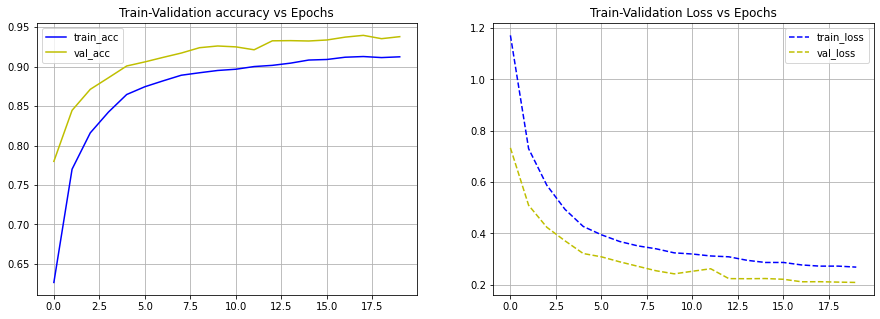

In [76]:
plot_performance(M3)

### 5. Saving the Model Weights

In [77]:
model_json = model3.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model3.save_weights("model3_final.h5")

In [78]:
def prediction(img):
    #plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(28, 28))
    #norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    norm_image=img/255.0
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model3.predict_classes([case])
    
    return ([i for i in train_set.class_indices if train_set.class_indices[i]==(pred[0])][0],pred)

In [79]:
train_set.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'times': 12}

In [80]:
label_map = (train_set.class_indices)
label_map

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'times': 12}

In [81]:
def image_path(path):
    image=cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
    edged = cv2.Canny(blurred, 30, 150)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    chars=[]
    for c in cnts:
    # compute the bounding box of the contour
        (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
        if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
            roi = gray[y:y + h, x:x + w]
            chars.append(prediction(roi))
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return chars,image

In [82]:

path='Downloads/test1.png'
chars,image=image_path(path)

In [83]:
chars

[('5', array([7], dtype=int64)),
 ('+', array([0], dtype=int64)),
 ('6', array([8], dtype=int64))]

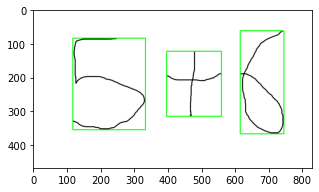

In [84]:
plt.figure(figsize=(5,5))
plt.imshow(image)

In [85]:
def NumericalSolver(characters):
        c=[]
        
        for i in characters:
            if i[0][:]=='x':
                pos = i[0][:].replace("x","*")
                c.append(pos)
            else:
                c.append(i[0][:])

        EQUATION=' '
        for i in c:
            EQUATION=EQUATION + (i[0][0])
        print('The Handwritten equation is :',EQUATION)
        print('The result is : ',eval(EQUATION))

In [86]:
NumericalSolver(chars)

The Handwritten equation is :  5+6
The result is :  11


In [89]:
path='Downloads/files/test.png'
chars,image=image_path(path)

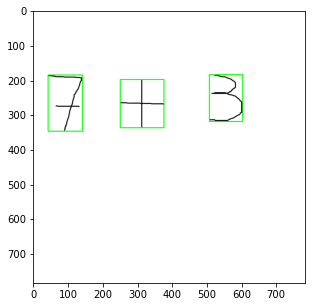

In [90]:
plt.figure(figsize=(5,5))
plt.imshow(image)

In [91]:
NumericalSolver(chars)

The Handwritten equation is :  7+3
The result is :  10
